In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**BREVE HISTÓRIA DA ANÁLISE DE DADOS:**

O dataframe traz uma análise abrangente de um levantamento sobre os fatores que podem contribuir para o aumento no nível de estresse dos alunos. Fatores sociais, psicológicos, fisiológicos e etc. são trazidos para se compreender como eles se interrelacionam contribuindo agravar ou amenizar problemas de saúde dos estudantes. A análise desses dados, seguirá um foco nos fatores psicológicos: depressão e ansiedade; fatores acadêmicos: tempo de estudo e desempenho acadêmico; fatores fisiológicos: qualidade de sono.

In [92]:
df = pd.read_csv("C:\\Users\\nargy\\Documents\\Estudos\\Semana-12\\on26-python-s12-pandas-numpy-II\\material\\StressLevelDataset.csv")
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


<small>perguntas norteadoras:</small>

<small>- quantos alunos estão no conjunto de dados?</small>

<small>- qual o tempo médio de estudo dos alunos?</small>

<small>- o tempo médio de estudo dos alunos está relacionado com a depressão?</small>

<small>- o tempo médio de estudo dos alunos está relacionado com a ansiedade?</small>

<small>- quantos estudantes classificam a qualidade do sono como ruim e isso se relaciona com a ansiedade?</small>

In [93]:
df.shape

(1100, 21)

In [94]:
#selecionando fatores das perguntas norteadoras
df_filter = df.loc[:, ["anxiety_level", "depression", "sleep_quality", "academic_performance", "study_load"]]

In [95]:
df_head = df_filter.head(100)
df_head

,anxiety_level,depression,sleep_quality,academic_performance,study_load
0,14,11,2,3,2
1,15,15,1,1,4
2,12,14,2,2,3
3,16,15,1,2,4
4,16,7,5,4,3
...,...,...,...,...,...
95,19,11,3,5,5
96,15,19,1,1,4
97,17,23,1,2,3
98,6,1,5,5,1


In [96]:
#descobrindo os valores máximos e mínimos das colunas:
valor_max_anxiety = df_head["anxiety_level"].max()
valor_min_anxiety = df_head["anxiety_level"].min()

valor_max_depression = df_head["depression"].max()
valor_min_depression = df_head["depression"].min()

valor_max_sleep = df_head["sleep_quality"].max()
valor_min_sleep = df_head["sleep_quality"].min()

valor_max_academic = df_head["academic_performance"].max()
valor_min_academic = df_head["academic_performance"].min()

valor_max_study = df_head["study_load"].max()
valor_min_study = df_head["study_load"].min()

print(f'Ansiedade max {valor_max_anxiety}, min {valor_min_anxiety}')
print(f'Depressão max {valor_max_depression}, min {valor_min_depression}')
print(f'Sono max {valor_max_sleep}, min {valor_min_sleep}')
print(f'Academic max {valor_max_academic}, min {valor_min_academic}')
print(f'Study max {valor_max_study}, min {valor_min_study}')


Ansiedade max 21, min 0
Depressão max 27, min 0
Sono max 5, min 0
Academic max 5, min 0
Study max 5, min 0


In [97]:
df_nao_nulos = df_head.dropna()
df_nao_nulos.shape

(100, 5)

In [103]:
#Qual o número de alunos do dataset?

num_alunos = len(df_head)
print("Possui", num_alunos, "alunos.")

Possui 100 alunos.


In [104]:
#Qual o tempo médio de estudo dos alunos?
media_estudo = df_head["study_load"].median()
print("O tempo médio de estudo dos alunos é:")
media_arredondada = print(round(media_estudo), "horas")

O tempo médio de estudo dos alunos é:
3 horas


In [100]:
#contagem de estudos dos alunos
cont_estudo = df_head["study_load"].value_counts().sort_index()
cont_estudo

study_load
0     3
1    15
2    31
3    28
4    13
5    10
Name: count, dtype: int64

In [101]:
#contagem dos níveis de depressão
media_depressao = df_head["depression"].value_counts().sort_index()
media_depressao

depression
0     5
1     4
2     3
3     5
4     2
5     6
6     3
7     3
8     4
9     2
10    5
11    4
12    5
13    5
14    8
15    3
16    1
17    1
18    4
19    2
20    4
21    3
22    4
23    3
24    3
25    2
26    2
27    4
Name: count, dtype: int64

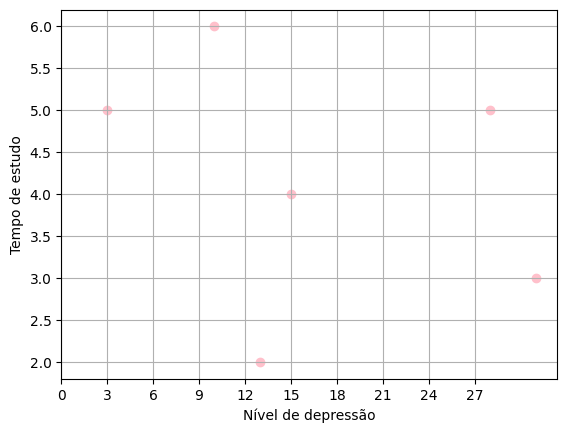

In [123]:

cont_estudo = df_head["study_load"].value_counts().sort_index()
media_depressao = df_head["depression"].value_counts().sort_index()
plt.scatter(data['study_load'], data['depression'], color='pink', label='Relação Tempo de Estudo x Depressão')
plt.xlabel('Nível de depressão')
plt.ylabel('Tempo de estudo')
plt.xticks(np.arange(0, 30, 3))
plt.grid()
plt.show()


É possível notar, a partir do gráfico de dispersão, que há uma tendencia de diminuição no tempo de estudo, a medida que o nível de depressão aumenta. 

In [124]:
#contagem dos níveis de ansiedade
cont_ansiedade = df_head["anxiety_level"].value_counts().sort_index()
cont_ansiedade

anxiety_level
0     3
1     3
2     3
3     3
4     5
5     5
6     5
7     6
8     5
9     8
10    2
11    5
12    5
13    7
14    1
15    5
16    3
17    9
18    4
19    4
20    4
21    5
Name: count, dtype: int64

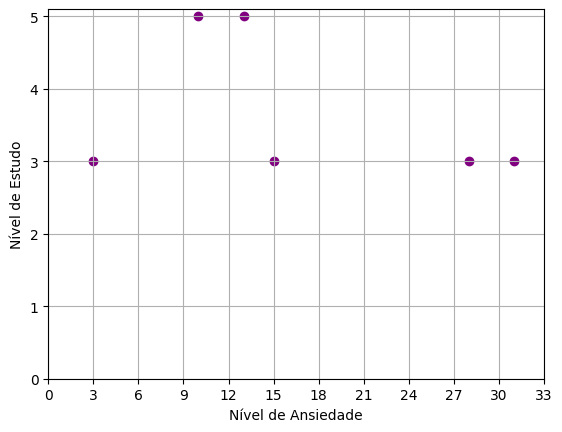

In [143]:
#ANSIEDADE E TEMPO DE ESTUDO
study_load = cont_estudo = df_head["study_load"].value_counts().sort_index()
anxiety_level = cont_ansiedade = df_head["anxiety_level"].value_counts().sort_index()
plt.scatter(data['study_load'],data['anxiety_level'], color='purple')
plt.xlabel('Nível de Ansiedade')
plt.xticks(np.arange(0, 35, 3))
plt.yticks(np.arange(0, 6, 1))
plt.ylabel('Nível de Estudo')
plt.grid()
plt.show()

O nível de ansiedade de alunos não é um fator impactante no seu tempo de estudo, uma vez que mesmo nos níveis mais baixo, se mantém na média de 3h

Relação ansiedade e sono

In [174]:
#Sono de má qualidade
sono_ruim = df_head[df_head['sleep_quality'] < 3]
num_sono_ruim = len(sono_ruim)
print(num_sono_ruim)

51


In [175]:
#alunos com nível de ansiedade elevados
ansiedade = df_head[df_head['anxiety_level'] > 10]
num_anxiedade = len(ansiedade)
print(num_anxiedade)

52


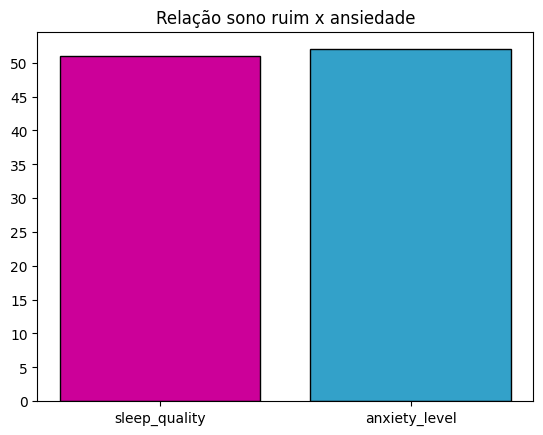

In [179]:
contagem = [num_sono_ruim, num_anxiedade]
categoria = ['sleep_quality', 'anxiety_level']
plt.bar(categoria, contagem, color=['#CC0099', '#33A1C9'], edgecolor = "black",)
plt.xlabel("")
plt.ylabel("")
plt.yticks(np.arange(0, 55, 5))
plt.title("Relação sono ruim x ansiedade")
plt.show()

É possível notar uma semelhaça entre a quantidade de alunos que possuem um sono ruim, abaixo do nível 3 e a quantidade de alunos com alto nível de ansiedade, acima do nível 10. Podemos, logo, supor que há uma grande relação entre a ansiedade e a falta de sono.